In [4]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
import seaborn as sns

# To extract and parse fundamental data from finviz website
import requests
from bs4 import BeautifulSoup as bs

# For parsing financial statements data from financialmodelingprep api
from urllib.request import urlopen
import json
def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

# Financialmodelingprep api url
base_url = "https://financialmodelingprep.com/api/v3/"

In [5]:
apiKey = "2105b9f242d47b69fc73f0f2205be048"
ticker = "INTC"

In [6]:
q_cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
q_cash_flow_statement = q_cash_flow_statement.set_index('date').iloc[:4] # extract for last 4 quarters
q_cash_flow_statement = q_cash_flow_statement.apply(pd.to_numeric, errors='coerce')

q_cash_flow_statement.iloc[:,4:].head()

,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-06-27,5105000000,3063000000,0.0,492000000.0,2.723000e+09,1.020000e+09,277000000.0,91000000.0,2.190900e+10,266000000.0,...,-3.191000e+09,0.0,-2.644000e+09,8736000000,1.138000e+10,11157000000,-3408000000,7.749000e+09,NaN,NaN
2020-03-28,5661000000,3050000000,0.0,449000000.0,-3.136000e+09,-7.960000e+08,-548000000.0,117000000.0,1.760600e+10,583000000.0,...,4.764000e+09,0.0,7.186000e+09,11380000000,4.194000e+09,6158000000,-3268000000,2.890000e+09,NaN,NaN
2019-12-28,6905000000,2968000000,0.0,410000000.0,7.870000e+08,-7.790000e+08,-105000000.0,-32000000.0,8.929000e+09,-772000000.0,...,-5.144000e+09,0.0,2.590000e+08,4194000000,3.935000e+09,9888000000,-4666000000,5.222000e+09,NaN,NaN
2019-09-28,5990000000,2679000000,0.0,431000000.0,1.906000e+09,-6.460000e+08,67000000.0,297000000.0,4.893000e+09,136000000.0,...,-5.733000e+09,0.0,1.068000e+09,3935000000,2.867000e+09,10711000000,-4672000000,6.039000e+09,NaN,NaN


In [7]:
cash_flow_statement = pd.DataFrame(get_jsonparsed_data(base_url+'cash-flow-statement/' + ticker + '?apikey=' + apiKey))
cash_flow_statement = cash_flow_statement.set_index('date')
cash_flow_statement = cash_flow_statement.apply(pd.to_numeric, errors='coerce')
    
cash_flow_statement.iloc[:,4:].head()

,netIncome,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2019-12-28,21048000000,10826000000,0.000000e+00,1.700000e+09,1148000000,-9.350000e+08,-1.481000e+09,696000000.0,8.929000e+09,1.230000e+08,...,-1.756500e+10,0.0,1175000000,4194000000,3019000000,33145000000,-16213000000,16932000000,NaN,NaN
2018-12-29,21053000000,9085000000,-1.749000e+09,1.500000e+09,-421000000,-1.714000e+09,-2.140000e+08,211000000.0,1.216100e+10,1.464000e+09,...,-1.860700e+10,0.0,-414000000,3019000000,3433000000,29432000000,-15181000000,14251000000,NaN,NaN
2017-12-30,9601000000,8129000000,1.548000e+09,1.400000e+09,3584000000,-7.810000e+08,-1.300000e+09,191000000.0,1.207900e+10,-7.520000e+08,...,-8.475000e+09,0.0,-2127000000,3433000000,5560000000,22110000000,-11778000000,10332000000,NaN,NaN
2016-12-31,10316000000,7790000000,2.570000e+08,1.444000e+09,668000000,6.500000e+07,1.190000e+08,182000000.0,1.520600e+10,2.777000e+09,...,-5.739000e+09,0.0,-9748000000,5560000000,15308000000,21808000000,-9625000000,12183000000,NaN,NaN
2015-12-26,11420000000,8711000000,-1.270000e+09,1.305000e+09,-1081000000,-3.550000e+08,-7.640000e+08,-312000000.0,2.468900e+10,1.237000e+09,...,1.912000e+09,1000000.0,12747000000,15308000000,2561000000,19017000000,-7446000000,11571000000,NaN,NaN


In [8]:
ttm_cash_flow_statement = q_cash_flow_statement.sum() # sum up last 4 quarters to get TTM cash flow
cash_flow_statement = cash_flow_statement[::-1].append(ttm_cash_flow_statement.rename('TTM')).drop(['netIncome'], axis=1)
final_cash_flow_statement = cash_flow_statement[::-1] # reverse list to show most recent ones first
final_cash_flow_statement.iloc[:,4:].head()

,depreciationAndAmortization,deferredIncomeTax,stockBasedCompensation,changeInWorkingCapital,accountsReceivables,inventory,accountsPayables,otherWorkingCapital,otherNonCashItems,netCashProvidedByOperatingActivities,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
TTM,1.176000e+10,0.000000e+00,1.782000e+09,2.280000e+09,-1.201000e+09,-3.090000e+08,473000000.0,5.333700e+10,2.130000e+08,3.791400e+10,...,-9.304000e+09,0.0,5.869000e+09,2.824500e+10,2.237600e+10,3.791400e+10,-1.601400e+10,2.190000e+10,0.0,0.0
2019-12-28,1.082600e+10,0.000000e+00,1.700000e+09,1.148000e+09,-9.350000e+08,-1.481000e+09,696000000.0,8.929000e+09,1.230000e+08,3.314500e+10,...,-1.756500e+10,0.0,1.175000e+09,4.194000e+09,3.019000e+09,3.314500e+10,-1.621300e+10,1.693200e+10,NaN,NaN
2018-12-29,9.085000e+09,-1.749000e+09,1.500000e+09,-4.210000e+08,-1.714000e+09,-2.140000e+08,211000000.0,1.216100e+10,1.464000e+09,2.943200e+10,...,-1.860700e+10,0.0,-4.140000e+08,3.019000e+09,3.433000e+09,2.943200e+10,-1.518100e+10,1.425100e+10,NaN,NaN
2017-12-30,8.129000e+09,1.548000e+09,1.400000e+09,3.584000e+09,-7.810000e+08,-1.300000e+09,191000000.0,1.207900e+10,-7.520000e+08,2.211000e+10,...,-8.475000e+09,0.0,-2.127000e+09,3.433000e+09,5.560000e+09,2.211000e+10,-1.177800e+10,1.033200e+10,NaN,NaN
2016-12-31,7.790000e+09,2.570000e+08,1.444000e+09,6.680000e+08,6.500000e+07,1.190000e+08,182000000.0,1.520600e+10,2.777000e+09,2.180800e+10,...,-5.739000e+09,0.0,-9.748000e+09,5.560000e+09,1.530800e+10,2.180800e+10,-9.625000e+09,1.218300e+10,NaN,NaN


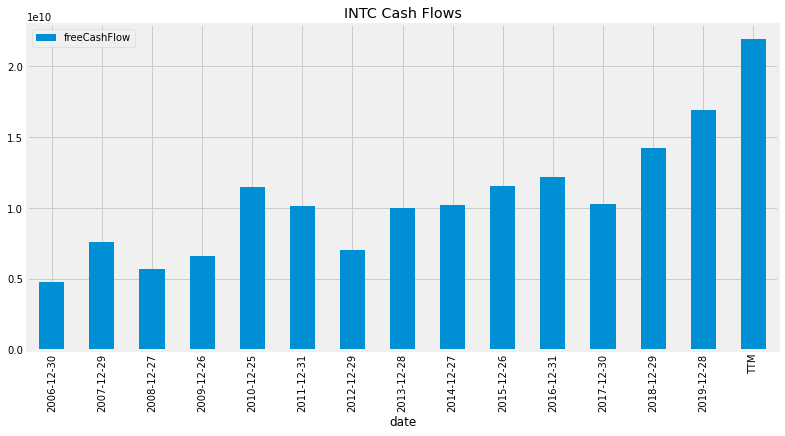

In [9]:
final_cash_flow_statement[['freeCashFlow']].iloc[::-1].iloc[-15:].plot(kind='bar', title=ticker + ' Cash Flows')
plt.show()

In [10]:
q_balance_statement = pd.DataFrame(get_jsonparsed_data(base_url+'balance-sheet-statement/' + ticker + '?period=quarter' + '&apikey=' + apiKey))
q_balance_statement = q_balance_statement.set_index('date')
q_balance_statement = q_balance_statement.apply(pd.to_numeric, errors='coerce')
q_balance_statement.iloc[:,4:].head()

,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,retainedEarnings,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,totalInvestments,totalDebt,netDebt,link,finalLink
date,,,,,,,,,,,,,,,,,,,,,
2020-06-27,8736000000,1.707900e+10,25815000000,7441000000,8969000000,2165000000,44390000000,58036000000,2.694300e+10,1.030300e+10,...,57646000000,-1152000000,-1.257000e+09,82010000000,152539000000,23864000000,38347000000,29611000000,NaN,NaN
2020-03-28,11380000000,9.423000e+09,20803000000,8455000000,9246000000,2997000000,41501000000,56770000000,2.627600e+10,1.042900e+10,...,52644000000,-1541000000,-1.327000e+09,76354000000,147710000000,16246000000,39919000000,28539000000,NaN,NaN
2019-12-28,4194000000,8.929000e+09,13123000000,7659000000,8744000000,1713000000,31239000000,56014000000,2.627600e+10,1.082700e+10,...,53523000000,-2250000000,-1.125000e+09,77659000000,136524000000,16172000000,29001000000,24807000000,NaN,NaN
2019-09-28,3935000000,8.090000e+09,12025000000,6880000000,8638000000,2414000000,29957000000,54215000000,2.472700e+10,1.101900e+10,...,49674000000,-1112000000,-5.560000e+08,74408000000,133768000000,16337000000,28907000000,24972000000,NaN,NaN
2019-06-29,2867000000,9.077000e+09,11944000000,6233000000,8696000000,2366000000,29239000000,52061000000,2.458300e+10,1.124900e+10,...,50429000000,-750000000,-3.750000e+08,75194000000,130759000000,17283000000,28815000000,25948000000,NaN,NaN


In [11]:
cash_flow = final_cash_flow_statement.iloc[0]['freeCashFlow']
total_debt = q_balance_statement.iloc[0]['totalDebt'] 
cash_and_ST_investments = q_balance_statement.iloc[0]['cashAndShortTermInvestments']

print("Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

Free Cash Flow:  21900000000.0
Total Debt:  38347000000.0
Cash and ST Investments:  25815000000.0


In [12]:
# List of data we want to extract from Finviz Table
metric = ['Price', 'EPS next 5Y', 'Beta', 'Shs Outstand']

def fundamental_metric(soup, metric):
    # the table which stores the data in Finviz has html table attribute class of 'snapshot-td2'
    return soup.find(text = metric).find_next(class_='snapshot-td2').text
   
def get_finviz_data(ticker):
    try:
        url = ("http://finviz.com/quote.ashx?t=" + ticker.lower())
        soup = bs(requests.get(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}).content)
        dict_finviz = {}        
        for m in metric:   
            dict_finviz[m] = fundamental_metric(soup,m)
        for key, value in dict_finviz.items():
            # replace percentages
            if (value[-1]=='%'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])
            # billion
            if (value[-1]=='B'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000000  
            # million
            if (value[-1]=='M'):
                dict_finviz[key] = value[:-1]
                dict_finviz[key] = float(dict_finviz[key])*1000000
            try:
                dict_finviz[key] = float(dict_finviz[key])
            except:
                pass 
    except Exception as e:
        print (e)
        print ('Not successful parsing ' + ticker + ' data.')        
    return dict_finviz

finviz_data = get_finviz_data(ticker)

finviz_data

{'Price': 52.82,
 'EPS next 5Y': 8.62,
 'Beta': 0.68,
 'Shs Outstand': 4250000000.0}

In [13]:
Beta = finviz_data['Beta']

discount_rate = 7
if(Beta<0.80):
    discount_rate = 5
elif(Beta>=0.80 and Beta<1):
    discount_rate = 6
elif(Beta>=1 and Beta<1.1):
    discount_rate = 6.5
elif(Beta>=1.1 and Beta<1.2):
    discount_rate = 7
elif(Beta>=1.2 and Beta<1.3):
    discount_rate =7.5
elif(Beta>=1.3 and Beta<1.4):
    discount_rate = 8
elif(Beta>=1.4 and Beta<1.6):
    discount_rate = 8.5
elif(Beta>=1.61):
    discount_rate = 9   

In [14]:
EPS_growth_5Y = finviz_data['EPS next 5Y']
EPS_growth_6Y_to_10Y = EPS_growth_5Y/2  # Half the previous growth rate, conservative estimate
EPS_growth_11Y_to_20Y  = np.minimum(EPS_growth_6Y_to_10Y, 4)  # Slightly higher than long term inflation rate, conservative estimate

shares_outstanding = finviz_data['Shs Outstand']

print("Free Cash Flow: ", cash_flow)
print("Total Debt: ", total_debt)
print("Cash and ST Investments: ", cash_and_ST_investments)

print("EPS Growth 5Y: ", EPS_growth_5Y)
print("EPS Growth 6Y to 10Y: ", EPS_growth_6Y_to_10Y)
print("EPS Growth 11Y to 20Y: ", EPS_growth_11Y_to_20Y)

print("Discount Rate: ", discount_rate)

print("Shares Outstanding: ", shares_outstanding)

Free Cash Flow:  21900000000.0
Total Debt:  38347000000.0
Cash and ST Investments:  25815000000.0
EPS Growth 5Y:  8.62
EPS Growth 6Y to 10Y:  4.31
EPS Growth 11Y to 20Y:  4.0
Discount Rate:  5
Shares Outstanding:  4250000000.0


Discounted Cash Flows

Year 1: $22655028571.42857
Year 2: $23436087651.70068
Year 3: $24244074673.59741
Year 4: $25079918009.963337
Year 5: $25944578040.40207
Year 6: $25774085098.99371
Year 7: $25604712539.77175
Year 8: $25436453000.224678
Year 9: $25269299166.223194
Year 10: $25103243771.7023
Year 11: $24864165259.590847
Year 12: $24627363685.68998
Year 13: $24392817364.873882
Year 14: $24160504818.541748
Year 15: $23930404772.650875
Year 16: $23702496155.76849
Year 17: $23476758097.14212
Year 18: $23253169924.788387
Year 19: $23031711163.599922
Year 20: $22812361533.470406


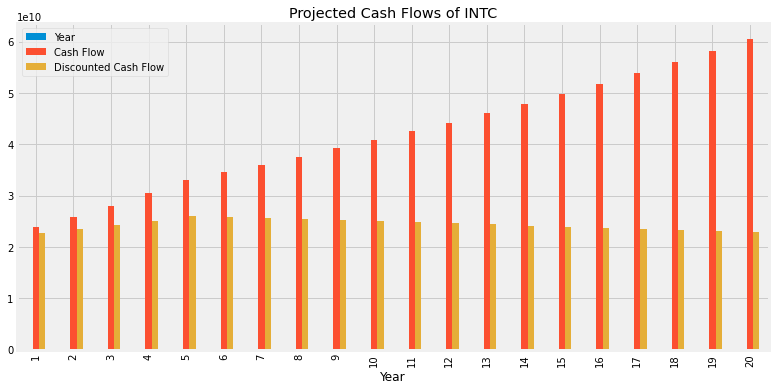

In [17]:
def calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate):   
    
    # Convert all percentages to decmials
    EPS_growth_5Y_d = EPS_growth_5Y/100
    EPS_growth_6Y_to_10Y_d = EPS_growth_6Y_to_10Y/100
    EPS_growth_11Y_to_20Y_d = EPS_growth_11Y_to_20Y/100
    discount_rate_d = discount_rate/100
    print("Discounted Cash Flows\n")
    
    # Lists of projected cash flows from year 1 to year 20
    cash_flow_list = []
    cash_flow_discounted_list = []
    year_list = []
    
    
    # Years 1 to 5
    for year in range(1, 6):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_5Y_d)        
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 6 to 10
    for year in range(6, 11):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_6Y_to_10Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    # Years 11 to 20
    for year in range(11, 21):
        year_list.append(year)
        cash_flow*=(1 + EPS_growth_11Y_to_20Y_d)
        cash_flow_list.append(cash_flow)
        cash_flow_discounted = cash_flow/((1 + discount_rate_d)**year)
        cash_flow_discounted_list.append(cash_flow_discounted)
        print("Year " + str(year) + ": $" + str(cash_flow_discounted)) ## Print out the projected discounted cash flows
    
    intrinsic_value = (sum(cash_flow_discounted_list) - total_debt + cash_and_ST_investments)/shares_outstanding
    df = pd.DataFrame.from_dict({'Year': year_list, 'Cash Flow': cash_flow_list, 'Discounted Cash Flow': cash_flow_discounted_list})
    df.index = df.Year
    df.plot(kind='bar', title = 'Projected Cash Flows of ' + ticker)
    plt.show()

    return intrinsic_value

    
intrinsic_value = calculate_intrinsic_value(cash_flow, total_debt, cash_and_ST_investments, 
                                  EPS_growth_5Y, EPS_growth_6Y_to_10Y, EPS_growth_11Y_to_20Y,
                                  shares_outstanding, discount_rate)   

In [18]:
print("Intrinsic Value: ", intrinsic_value)
current_price = finviz_data['Price']
print("Current Price: ", current_price)
print("Margin of Safety: ", (1-current_price/intrinsic_value)*100)    

Intrinsic Value:  111.59229018826454
Current Price:  52.82
Margin of Safety:  52.66698092593251
